# 課題1

## MLPを用いたパターン識別

それでは手書き文字データセット MNIST の識別を，多層パーセプトロン(Multi layer Perceptron: MLP)を用いて行ってみなさい．

ヒントとしては演習1-４でMLPを用いた低次元の分類をやっています．これに演習１-5で行った，多クラス分類を組み合わせることで解決できます．
MLPの中間層の個数は適当で構いません．とりあえずは 100 個程度でやってみてください．

入力が 28x28 =784 で出力が　10 個ですので，

(784) - (100) - (10)

というネットワーク構造になります．

後は興味に応じて，層を深くしてみたり，中間層の個数を変えて（ほどほどに）実験してみてください．
基本はこの jupyter notebook に書き込んでいってください．

In [1]:
import os

# proxyの設定．
# keras.datasetsでは，datasetを直接ダウンロードするので，学内マシンからは通常必要．
os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"    # IEDの場合，必要に応じて指定．未指定はランダムに割り当てられる．



In [2]:
# 下準備
import numpy as np
import matplotlib.pylab as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

MNIST のデータセットの読み込みを `tensorflow.keras.datasets.mnist.load_data()` で行うと，学習用の文字データとラベル，テスト用の文字データとラベルが返ってくる

In [3]:
# データセットの読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数値データは 28 x 28 の画素からなり， 画素値は　[0, 255] の数値．　画素値が大きいと取り扱いにくいので，全部 [0, 1] へ標準化

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
xx = x_test
yy = y_test
x_train /= 255
x_test /= 255

# ラベルデータを tensorflow の形式に合致するよう変換 

# データは， 28x 28 =784 次元で，２次元配列の形をしている意味は今はないので，
# reshape で１次元になおしてしまおう

input_shape = 28 * 28
x_train = x_train.reshape(60000, input_shape)
x_test = x_test.reshape(10000, input_shape)

# 他クラス分類ように y をカテゴリカルな変数に変換
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


### これで下準備完了

(x_train, y_train) にデータが入っていて，(x_test, y_test) に評価用のデータが入っている

ためしにデータを表示させt見る

label =  7


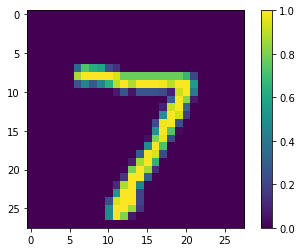

In [4]:
plt.imshow(xx[0])
print('label = ', yy[0])
plt.colorbar()

## Keras + TensorFlow を用いて，MNISTデータセットをMLPを用いて分類しなさい．


In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# 以下にコードを書いていくこと
model = Sequential()
model.add(Dense(100,input_shape=(input_shape,),use_bias=True))
model.add(Activation('softmax'))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss='categorial_crossentropy',optimizer='adam')


In [9]:
hist = model.fit(x_train, y_train, epochs=1024, batch_size=100, verbose=0)

ValueError: in user code:

    File "/Users/niwakazuma/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/Users/niwakazuma/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/niwakazuma/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/Users/niwakazuma/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "/Users/niwakazuma/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 184, in __call__
        self.build(y_pred)
    File "/Users/niwakazuma/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 133, in build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    File "/Users/niwakazuma/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 273, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/Users/niwakazuma/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/losses.py", line 2134, in get
        return deserialize(identifier)
    File "/Users/niwakazuma/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/losses.py", line 2089, in deserialize
        return deserialize_keras_object(
    File "/Users/niwakazuma/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/utils/generic_utils.py", line 708, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: categorial_crossentropy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [ ]:
# ロスの値が学習によってどう変わるかを表示すること
plt.semilogy(hist.history['loss'])
plt.title('Loss Evolution')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()

In [ ]:
# x_test データがどの程度正しく分類できているかを評価しなさい
p=0
print('True label', np.argmax(y_test[p]))
print('Estimate label',np.argmax(model.predict(x_test[p:p+1])))

plt.imshow(x_test[p].reshape(28,28))
plt.colorbar()
y_predict = np.argmax(model.predict(x_test),axis=-1)
residual = to_categorical(y_predict)-y_test
errnum = residual.max(axis=1).sum()
print("Error rate = %.3f"%(errnum/10000))